**Simulating Data Collection**

In [ ]:
# Importing Libraries
import time
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate timestamps
start_time = datetime.now()
timestamps = [start_time + timedelta(seconds=i) for i in range(3600)]

# Simulate water level data (in cm)
water_levels = np.random.normal(loc=100, scale=10, size=3600)

# Simulate water flow data (in L/min)
flow_rates = np.random.normal(loc=50, scale=5, size=3600)

# Simulate clog detection data (0: no clog, 1: clog)
clog_status = np.random.choice([0, 1], size=3600, p=[0.95, 0.05])

# Create a DataFrame
df = pd.DataFrame({
    'timestamp': timestamps,
    'water_level': water_levels,
    'flow_rate': flow_rates,
    'clog_status': clog_status
})

# Convert timestamp column to datetime format (just to be sure)
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Set the timestamp as the index
df.set_index('timestamp', inplace=True)

# Display the first few rows of the DataFrame
print(df.head())


                            water_level  flow_rate  clog_status
timestamp                                                      
2024-07-03 17:20:23.760991   104.967142  45.880323            0
2024-07-03 17:20:24.760991    98.617357  46.404453            1
2024-07-03 17:20:25.760991   106.476885  60.249060            0
2024-07-03 17:20:26.760991   115.230299  50.003414            0
2024-07-03 17:20:27.760991    97.658466  53.910650            0


***Data Processing and Analysis***

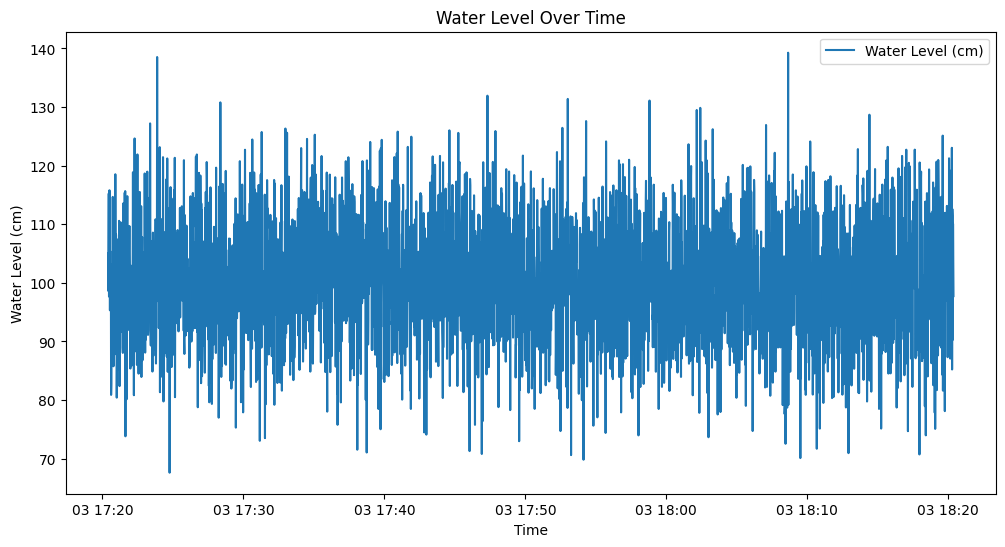

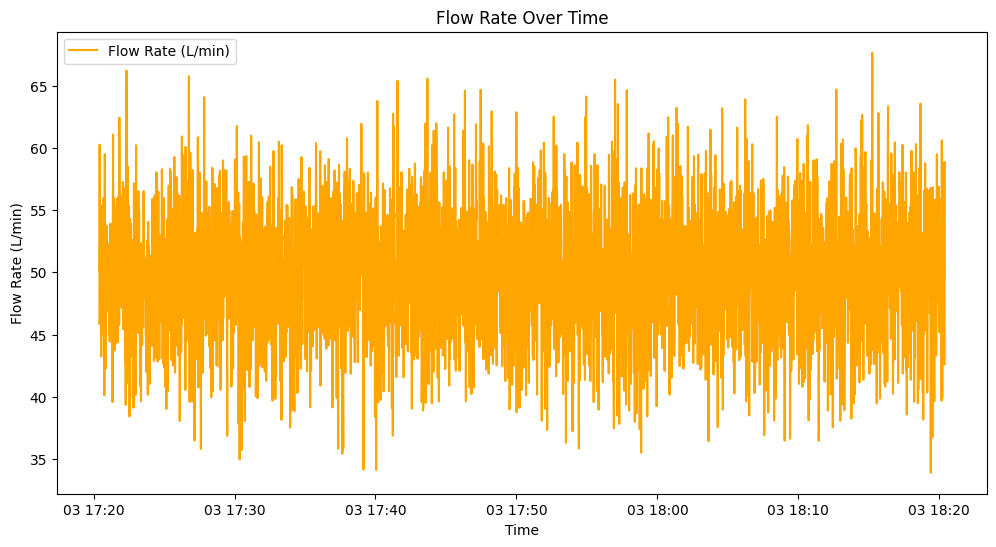

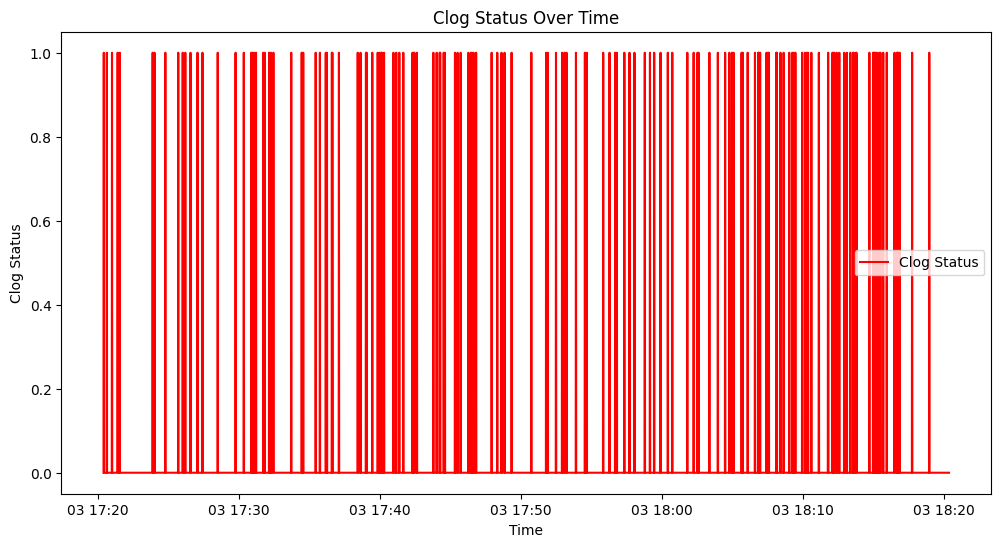

In [ ]:
# Plot water levels
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['water_level'], label='Water Level (cm)')
plt.xlabel('Time')
plt.ylabel('Water Level (cm)')
plt.title('Water Level Over Time')
plt.legend()
plt.show()

# Plot flow rates
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['flow_rate'], label='Flow Rate (L/min)', color='orange')
plt.xlabel('Time')
plt.ylabel('Flow Rate (L/min)')
plt.title('Flow Rate Over Time')
plt.legend()
plt.show()

# Plot clog status
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['clog_status'], label='Clog Status', color='red')
plt.xlabel('Time')
plt.ylabel('Clog Status')
plt.title('Clog Status Over Time')
plt.legend()
plt.show()


***Anomaly Detection and Predictive Analytics***

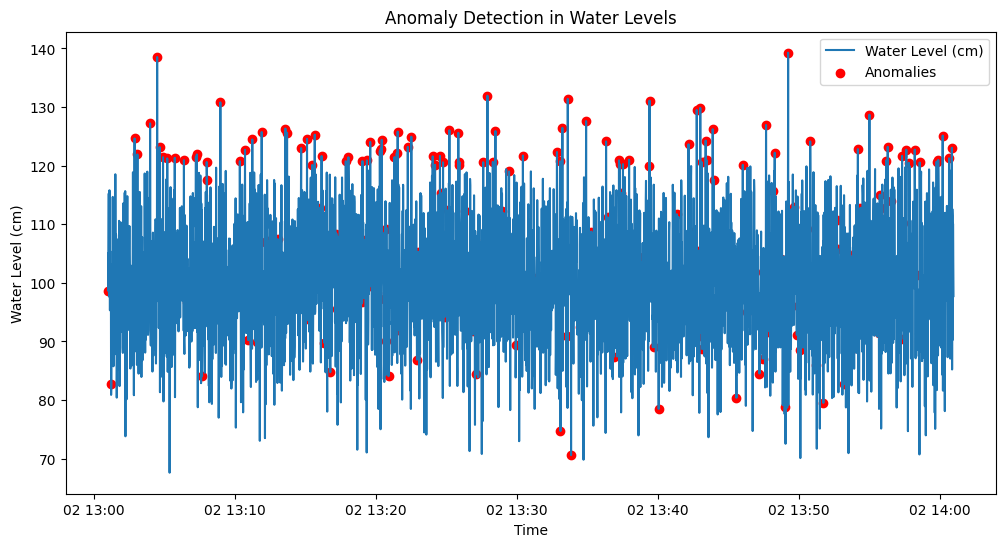

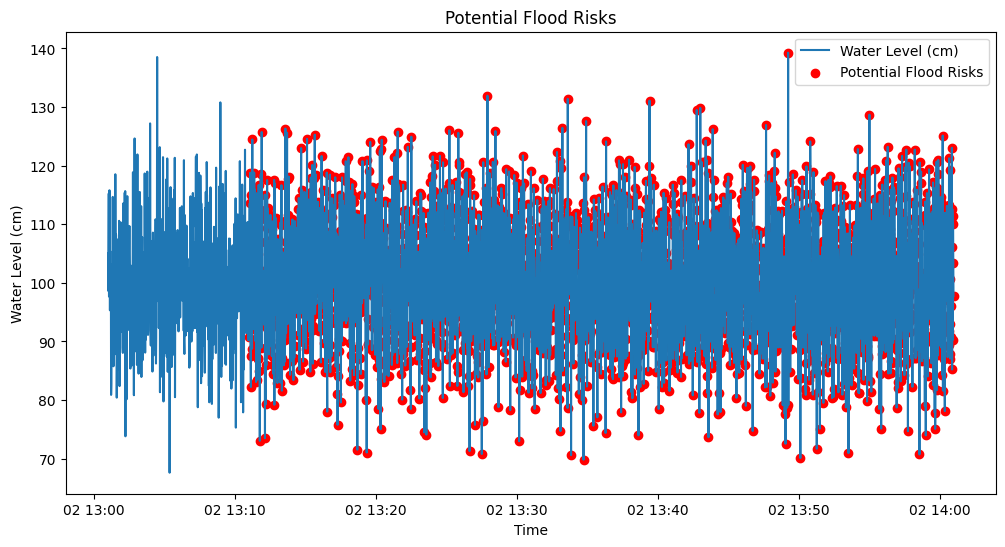

In [ ]:
# Define thresholds for anomalies
water_level_threshold = 120  # cm
flow_rate_threshold = 70  # L/min

# Detect anomalies
df['anomaly'] = ((df['water_level'] > water_level_threshold) | (df['flow_rate'] > flow_rate_threshold) | (df['clog_status'] == 1)).astype(int)

# Plot anomalies
anomalies = df[df['anomaly'] == 1]
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['water_level'], label='Water Level (cm)')
plt.scatter(anomalies['timestamp'], anomalies['water_level'], color='red', label='Anomalies')
plt.xlabel('Time')
plt.ylabel('Water Level (cm)')
plt.title('Anomaly Detection in Water Levels')
plt.legend()
plt.show()

# Forecast potential flood events
# For simplicity, let's assume if there are anomalies detected consecutively for more than 10 minutes, we consider it a potential flood risk
df['consecutive_anomalies'] = df['anomaly'].rolling(window=600).sum()
flood_risks = df[df['consecutive_anomalies'] > 10]

# Plot potential flood risks
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['water_level'], label='Water Level (cm)')
plt.scatter(flood_risks['timestamp'], flood_risks['water_level'], color='red', label='Potential Flood Risks')
plt.xlabel('Time')
plt.ylabel('Water Level (cm)')
plt.title('Potential Flood Risks')
plt.legend()
plt.show()


**Real-time data simulation and processing**

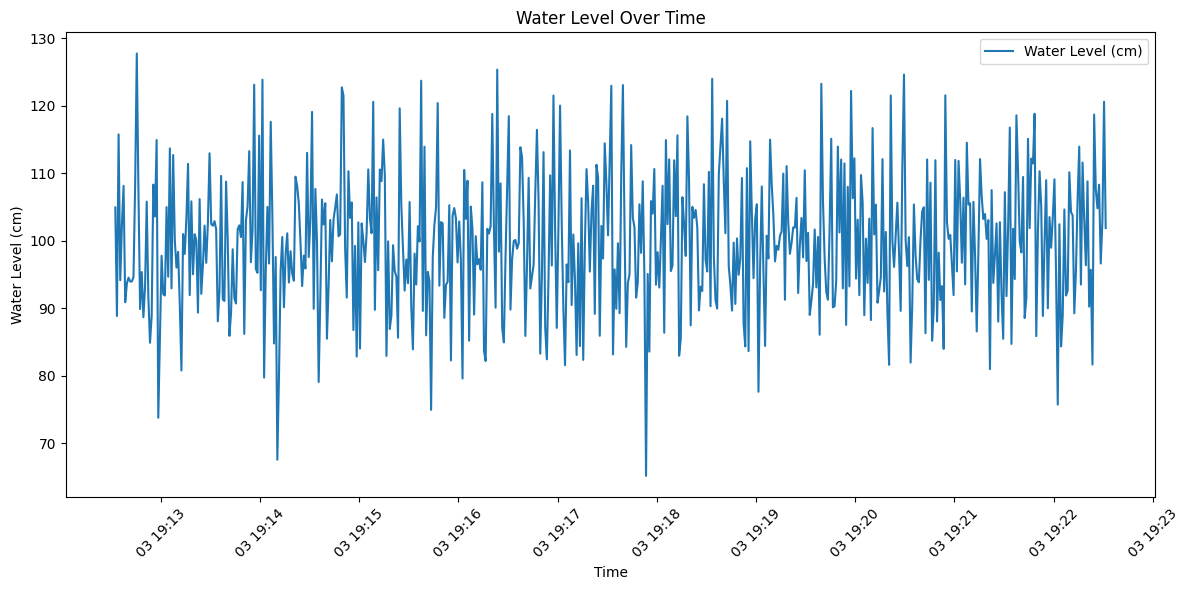

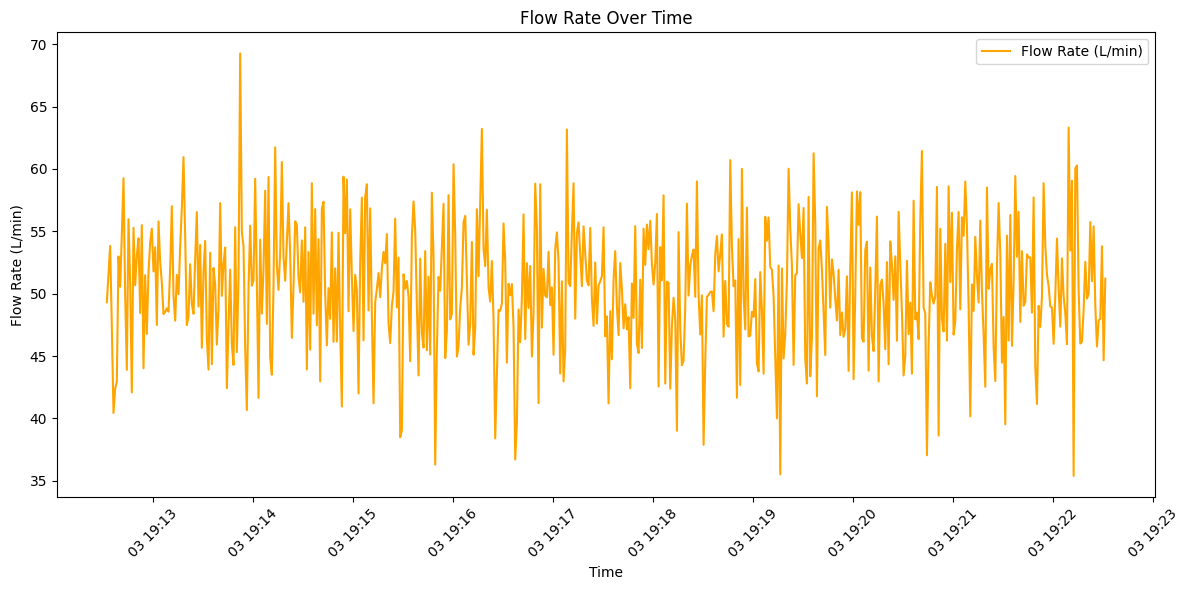

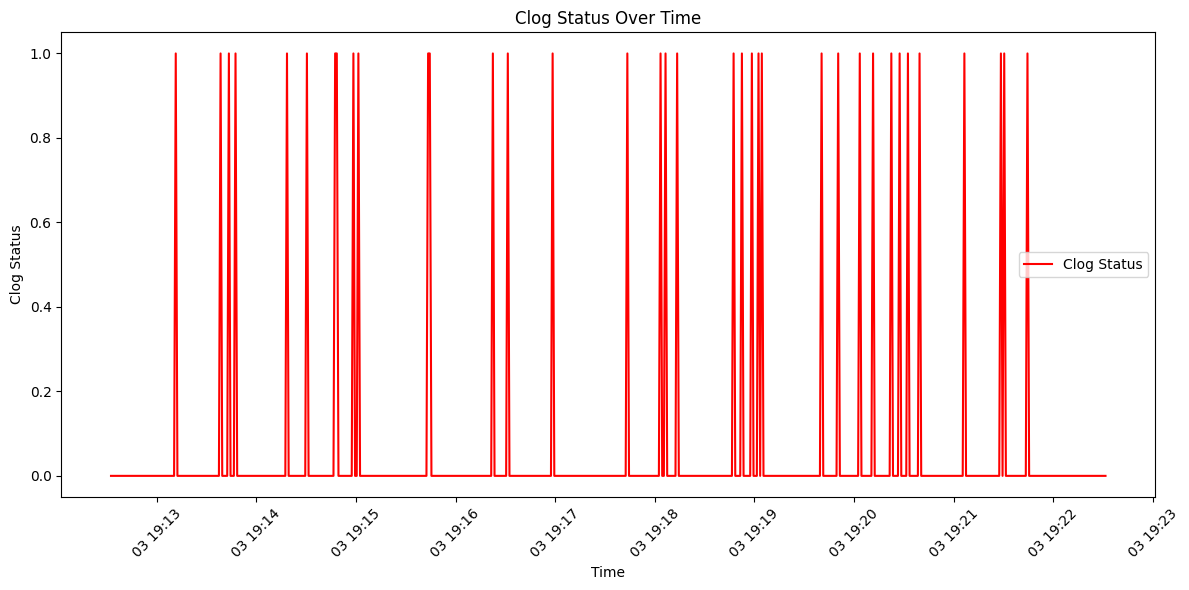

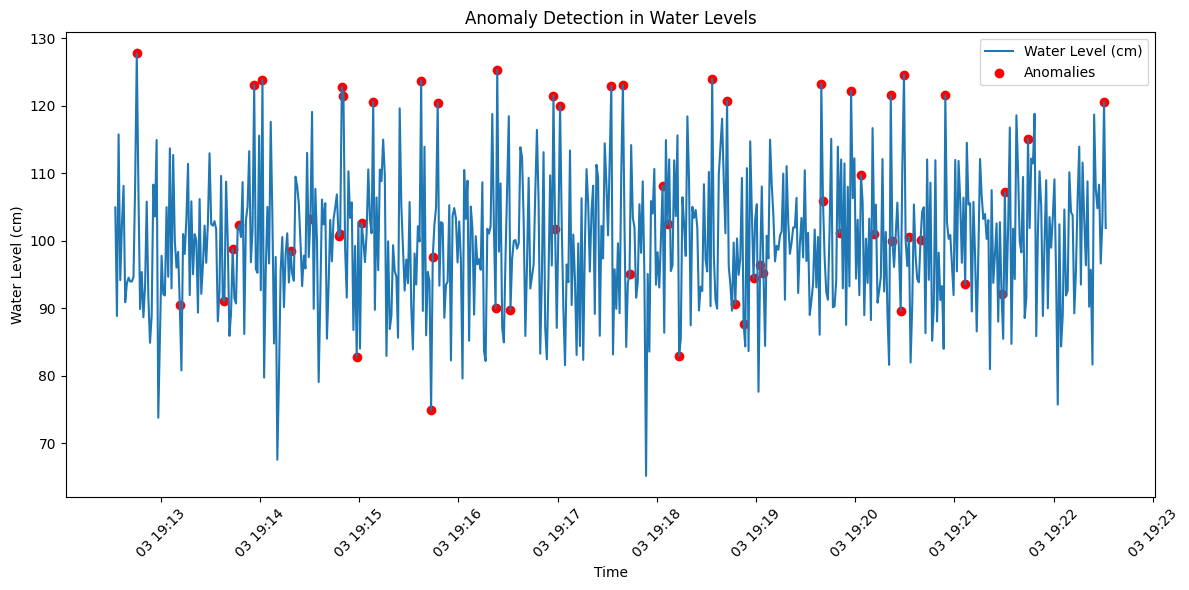

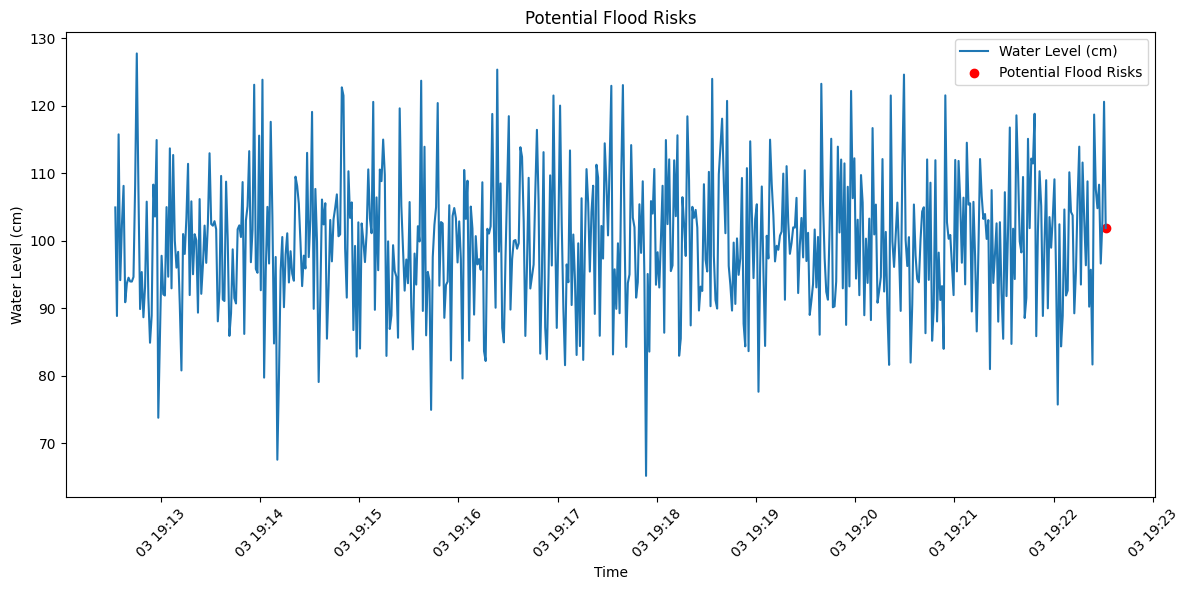

In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import time

# Set random seed for reproducibility
np.random.seed(42)

# Define thresholds for anomalies
water_level_threshold = 120  # cm
flow_rate_threshold = 70  # L/min

# Function to generate simulated data
def generate_data(current_time):
    water_level = np.random.normal(loc=100, scale=10)
    flow_rate = np.random.normal(loc=50, scale=5)
    clog_status = np.random.choice([0, 1], p=[0.95, 0.05])
    return current_time, water_level, flow_rate, clog_status

# Function to detect anomalies
def detect_anomaly(water_level, flow_rate, clog_status):
    return (water_level > water_level_threshold) or (flow_rate > flow_rate_threshold) or (clog_status == 1)

# Initialize a list to store data
data = []

# Real-time data simulation and processing
start_time = datetime.now()
for i in range(600):  # Simulate for one hour
    current_time = start_time + timedelta(seconds=i)
    timestamp, water_level, flow_rate, clog_status = generate_data(current_time)
    anomaly = detect_anomaly(water_level, flow_rate, clog_status)
    data.append([timestamp, water_level, flow_rate, clog_status, anomaly])
    time.sleep(1)  # Uncomment this for real-time simulation

# Convert list to DataFrame
df = pd.DataFrame(data, columns=['timestamp', 'water_level', 'flow_rate', 'clog_status', 'anomaly'])

# Plot water levels
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['water_level'], label='Water Level (cm)')
plt.xlabel('Time')
plt.ylabel('Water Level (cm)')
plt.title('Water Level Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot flow rates
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['flow_rate'], label='Flow Rate (L/min)', color='orange')
plt.xlabel('Time')
plt.ylabel('Flow Rate (L/min)')
plt.title('Flow Rate Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot clog status
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['clog_status'], label='Clog Status', color='red')
plt.xlabel('Time')
plt.ylabel('Clog Status')
plt.title('Clog Status Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot anomalies
anomalies = df[df['anomaly'] == True]
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['water_level'], label='Water Level (cm)')
plt.scatter(anomalies['timestamp'], anomalies['water_level'], color='red', label='Anomalies')
plt.xlabel('Time')
plt.ylabel('Water Level (cm)')
plt.title('Anomaly Detection in Water Levels')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Forecast potential flood events
# Consider potential flood risk if anomalies are detected consecutively for more than 10 minutes
df['consecutive_anomalies'] = df['anomaly'].rolling(window=600).sum()
flood_risks = df[df['consecutive_anomalies'] > 10]

# Plot potential flood risks
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['water_level'], label='Water Level (cm)')
plt.scatter(flood_risks['timestamp'], flood_risks['water_level'], color='red', label='Potential Flood Risks')
plt.xlabel('Time')
plt.ylabel('Water Level (cm)')
plt.title('Potential Flood Risks')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()





*Highlighting Clog Status*

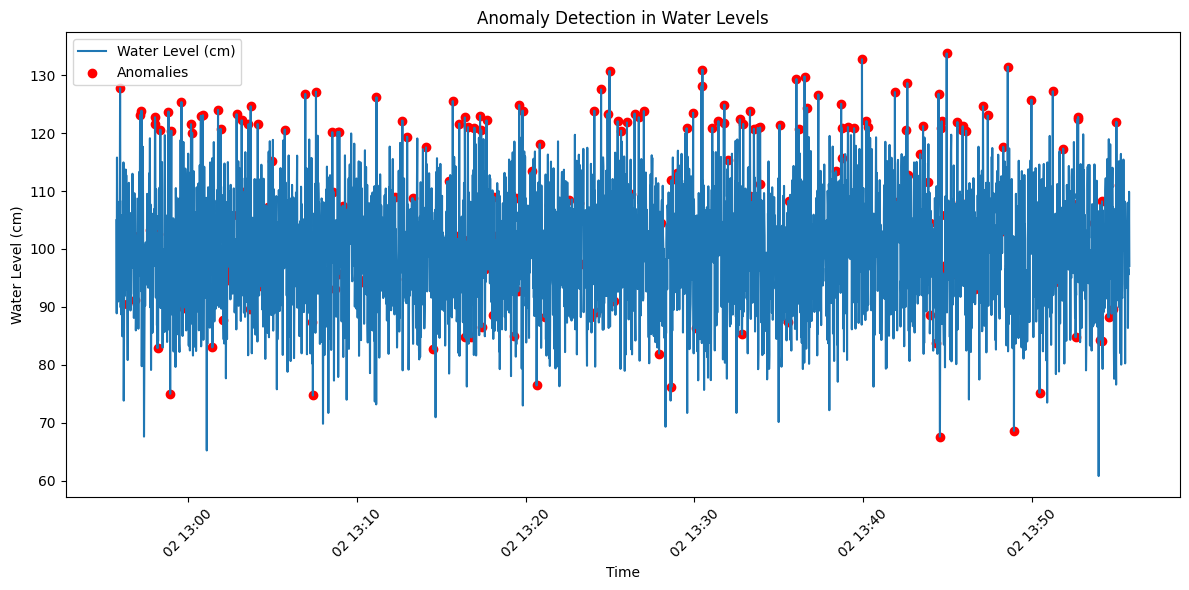

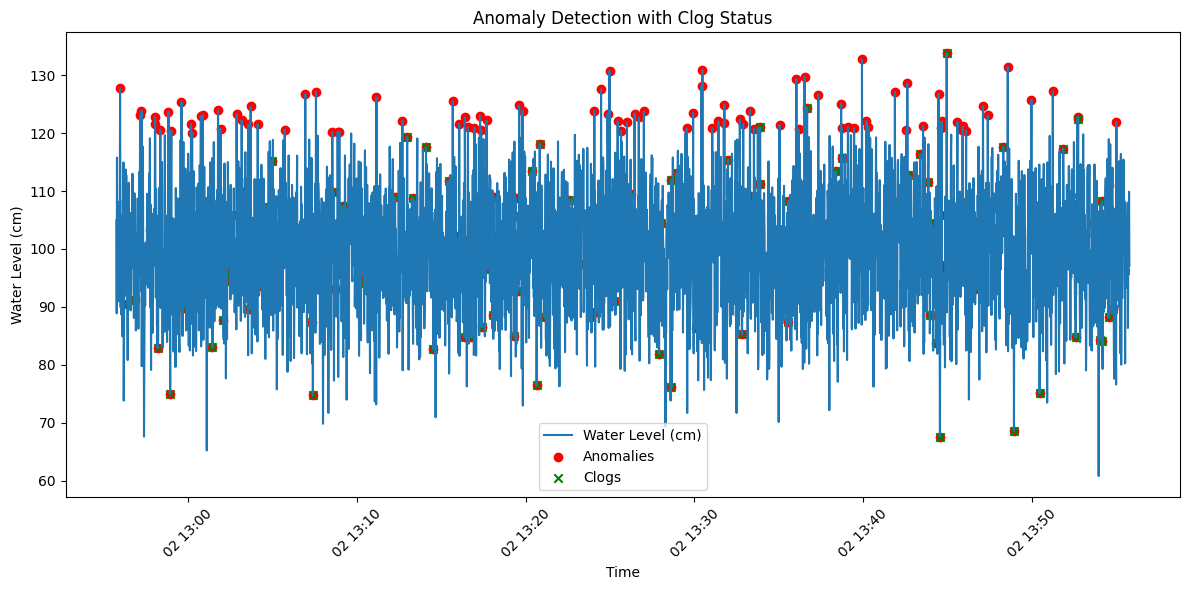

In [ ]:

#Adjusting Time Intervals
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['water_level'], label='Water Level (cm)')
plt.scatter(anomalies['timestamp'], anomalies['water_level'], color='red', label='Anomalies')
plt.xlabel('Time')
plt.ylabel('Water Level (cm)')
plt.title('Anomaly Detection in Water Levels')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()
plt.show()


# Highlighting Clog Status
clogs = df[df['clog_status'] == 1]
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['water_level'], label='Water Level (cm)')
plt.scatter(anomalies['timestamp'], anomalies['water_level'], color='red', label='Anomalies')
plt.scatter(clogs['timestamp'], clogs['water_level'], color='green', label='Clogs', marker='x')
plt.xlabel('Time')
plt.ylabel('Water Level (cm)')
plt.title('Anomaly Detection with Clog Status')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


ALERT! Anomaly detected at 2024-07-07 10:08:58.316210
Water Level: 127.7831304155244 cm, Flow Rate: 55.96819862141159 L/min, Clog Status: 0
ALERT! Anomaly detected at 2024-07-07 10:09:24.316210
Water Level: 90.56943191532737 cm, Flow Rate: 57.019793693296464 L/min, Clog Status: 1
ALERT! Anomaly detected at 2024-07-07 10:09:51.316210
Water Level: 91.10485570374476 cm, Flow Rate: 45.92094857517281 L/min, Clog Status: 1
ALERT! Anomaly detected at 2024-07-07 10:09:56.316210
Water Level: 98.7586761111834 cm, Flow Rate: 53.70170408973869 L/min, Clog Status: 1
ALERT! Anomaly detected at 2024-07-07 10:10:00.316210
Water Level: 102.30953722945132 cm, Flow Rate: 45.955315543048194 L/min, Clog Status: 1
ALERT! Anomaly detected at 2024-07-07 10:10:09.316210
Water Level: 123.14658566673509 cm, Flow Rate: 40.66367403704126 L/min, Clog Status: 0
ALERT! Anomaly detected at 2024-07-07 10:10:14.316210
Water Level: 123.89035957392463 cm, Flow Rate: 59.217068791602664 L/min, Clog Status: 0
ALERT! Anomaly 

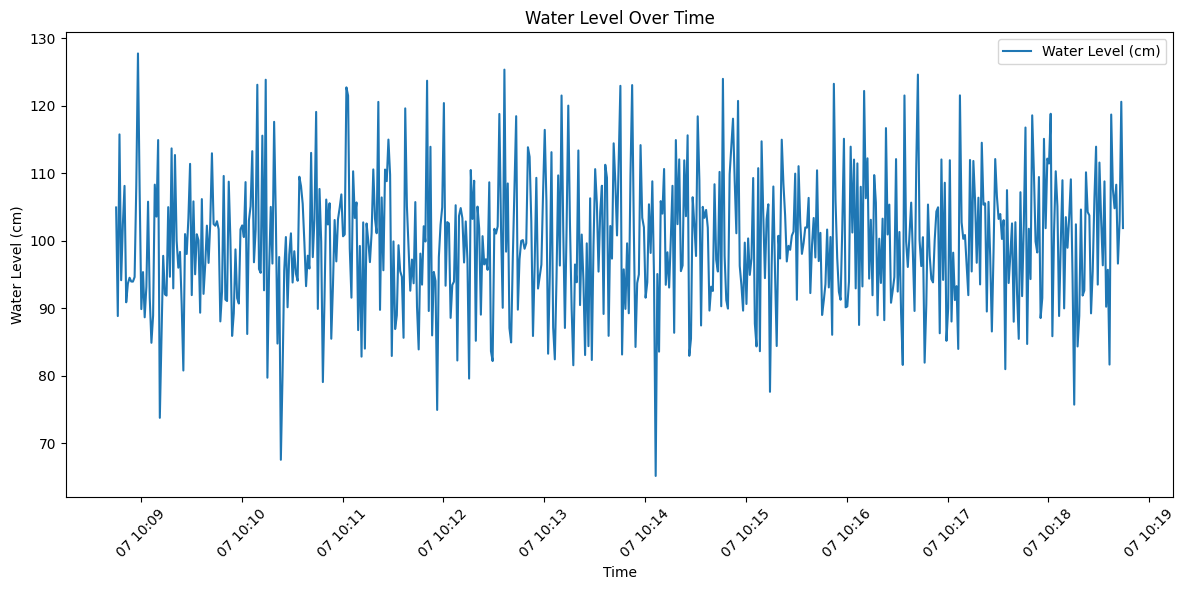

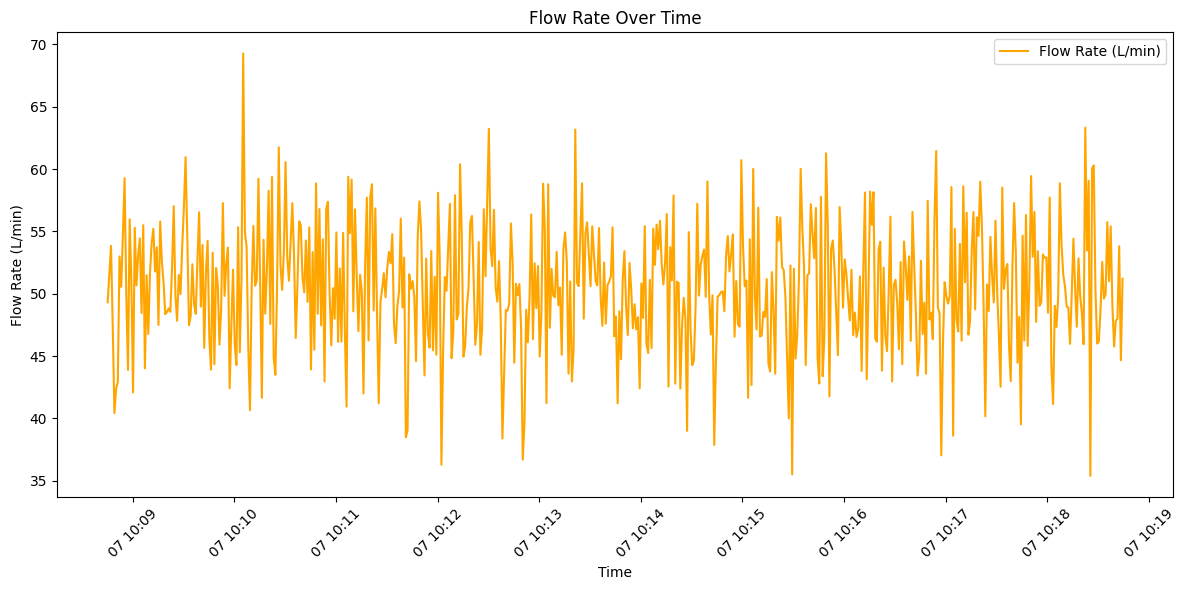

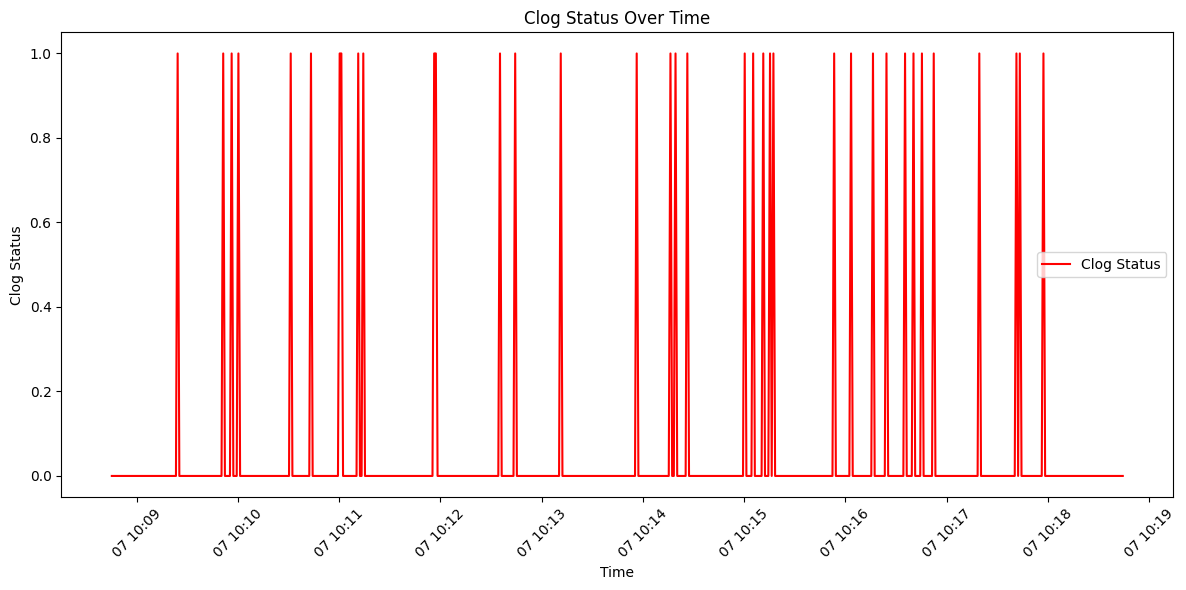

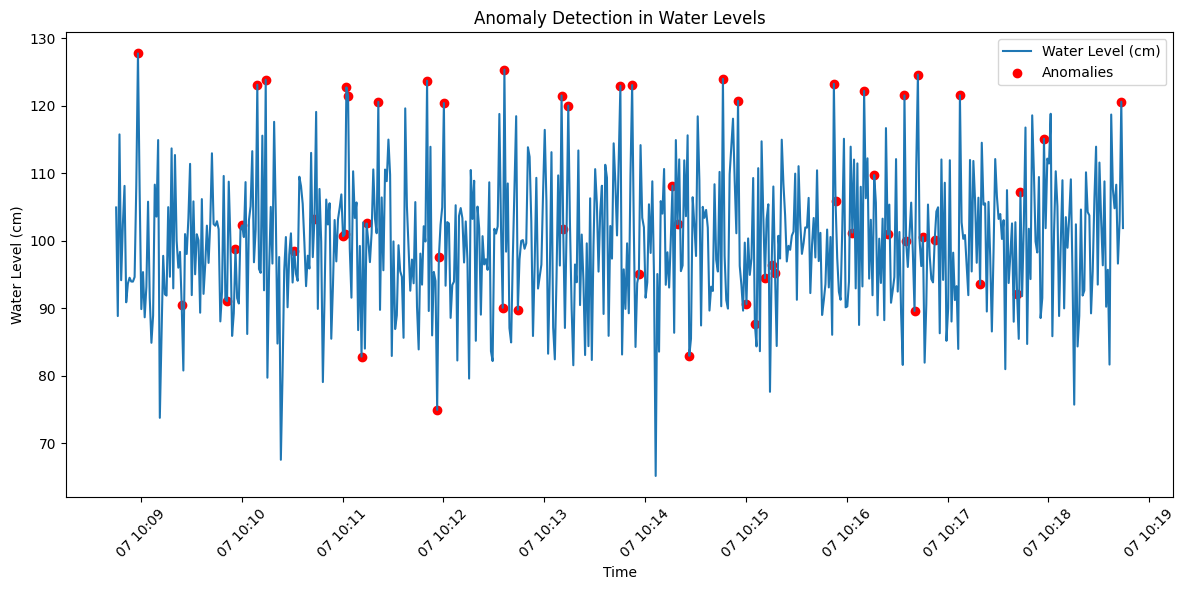

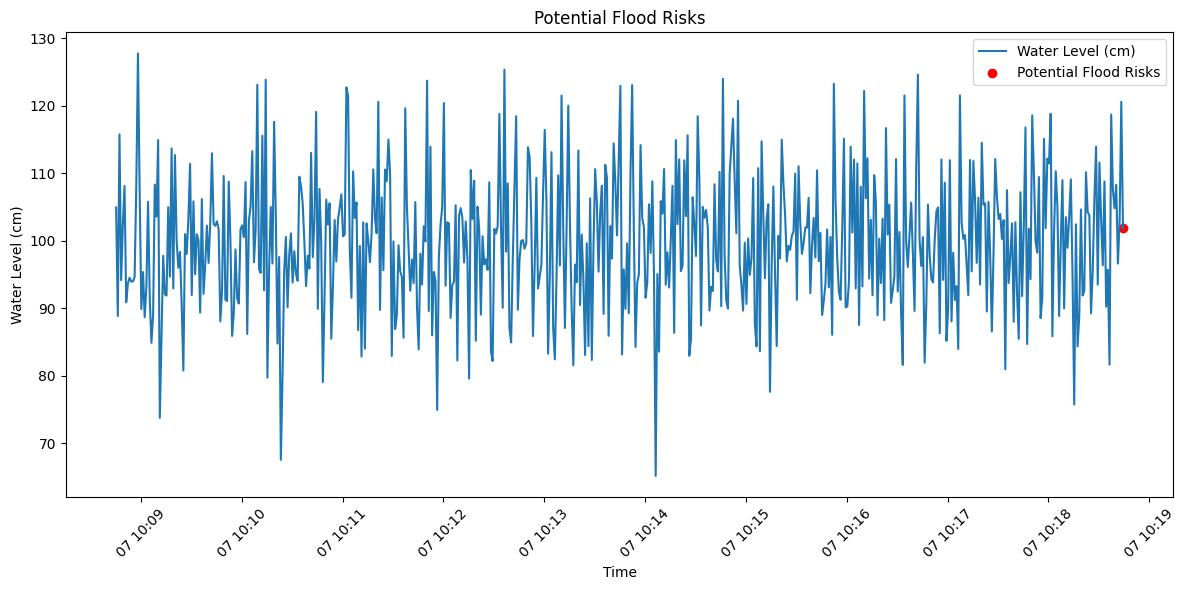

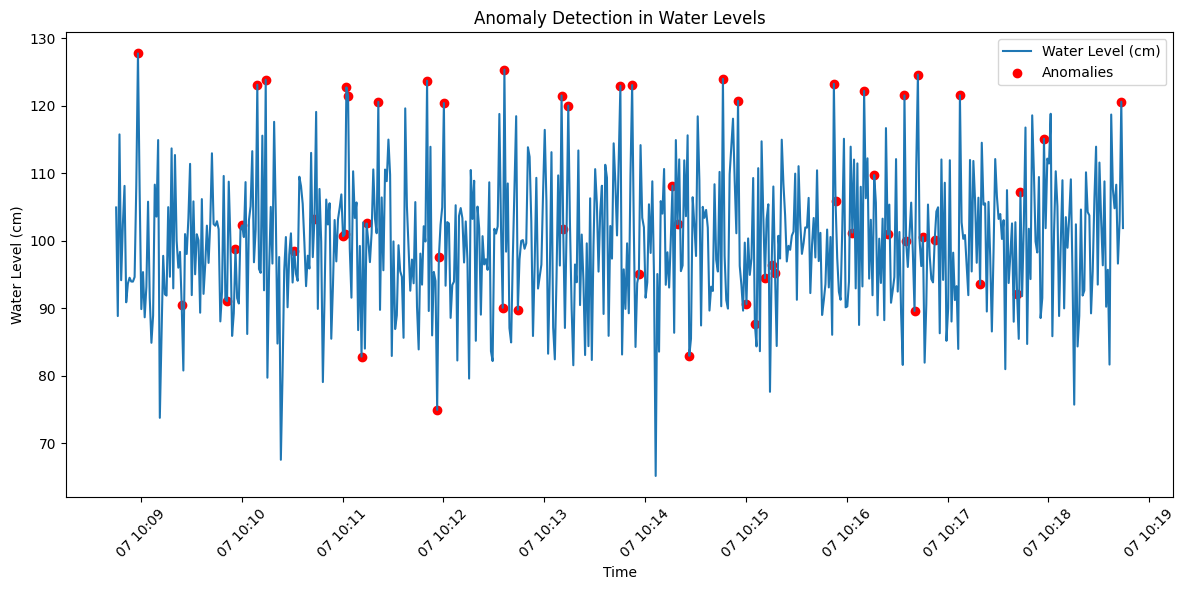

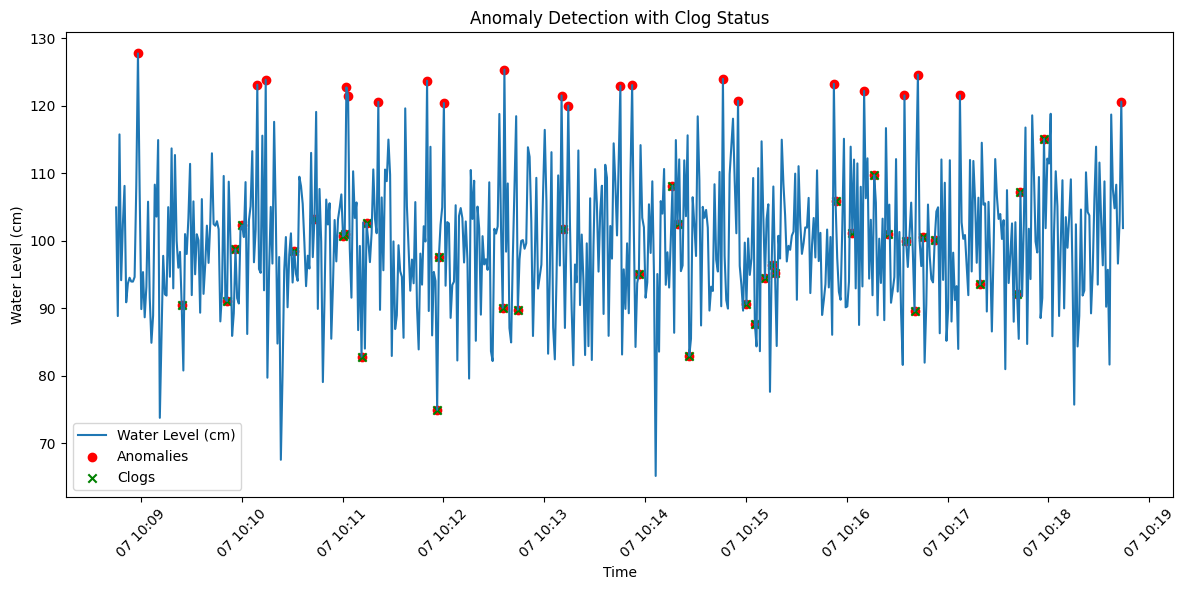

In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import time

# Set random seed for reproducibility
np.random.seed(42)

# Define thresholds for anomalies
water_level_threshold = 120  # cm
flow_rate_threshold = 70  # L/min

# Function to generate simulated data
def generate_data(current_time):
    water_level = np.random.normal(loc=100, scale=10)
    flow_rate = np.random.normal(loc=50, scale=5)
    clog_status = np.random.choice([0, 1], p=[0.95, 0.05])
    return current_time, water_level, flow_rate, clog_status

# Function to detect anomalies
def detect_anomaly(water_level, flow_rate, clog_status):
    return (water_level > water_level_threshold) or (flow_rate > flow_rate_threshold) or (clog_status == 1)

# Function to send an alert
def send_alert(timestamp, water_level, flow_rate, clog_status):
    print(f"ALERT! Anomaly detected at {timestamp}")
    print(f"Water Level: {water_level} cm, Flow Rate: {flow_rate} L/min, Clog Status: {clog_status}")

# Initialize a list to store data
data = []

# Real-time data simulation and processing
start_time = datetime.now()
for i in range(600):  # Simulate for one hour
    current_time = start_time + timedelta(seconds=i)
    timestamp, water_level, flow_rate, clog_status = generate_data(current_time)
    anomaly = detect_anomaly(water_level, flow_rate, clog_status)
    data.append([timestamp, water_level, flow_rate, clog_status, anomaly])

    if anomaly:
        send_alert(timestamp, water_level, flow_rate, clog_status)

    time.sleep(1)  # Uncomment this for real-time simulation

# Convert list to DataFrame
df = pd.DataFrame(data, columns=['timestamp', 'water_level', 'flow_rate', 'clog_status', 'anomaly'])

# Plot water levels
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['water_level'], label='Water Level (cm)')
plt.xlabel('Time')
plt.ylabel('Water Level (cm)')
plt.title('Water Level Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot flow rates
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['flow_rate'], label='Flow Rate (L/min)', color='orange')
plt.xlabel('Time')
plt.ylabel('Flow Rate (L/min)')
plt.title('Flow Rate Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot clog status
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['clog_status'], label='Clog Status', color='red')
plt.xlabel('Time')
plt.ylabel('Clog Status')
plt.title('Clog Status Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot anomalies
anomalies = df[df['anomaly'] == True]
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['water_level'], label='Water Level (cm)')
plt.scatter(anomalies['timestamp'], anomalies['water_level'], color='red', label='Anomalies')
plt.xlabel('Time')
plt.ylabel('Water Level (cm)')
plt.title('Anomaly Detection in Water Levels')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Forecast potential flood events
# Consider potential flood risk if anomalies are detected consecutively for more than 10 minutes
df['consecutive_anomalies'] = df['anomaly'].rolling(window=600).sum()
flood_risks = df[df['consecutive_anomalies'] > 10]

# Plot potential flood risks
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['water_level'], label='Water Level (cm)')
plt.scatter(flood_risks['timestamp'], flood_risks['water_level'], color='red', label='Potential Flood Risks')
plt.xlabel('Time')
plt.ylabel('Water Level (cm)')
plt.title('Potential Flood Risks')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Adjusting Time Intervals
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['water_level'], label='Water Level (cm)')
plt.scatter(anomalies['timestamp'], anomalies['water_level'], color='red', label='Anomalies')
plt.xlabel('Time')
plt.ylabel('Water Level (cm)')
plt.title('Anomaly Detection in Water Levels')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()
plt.show()

# Highlighting Clog Status
clogs = df[df['clog_status'] == 1]
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['water_level'], label='Water Level (cm)')
plt.scatter(anomalies['timestamp'], anomalies['water_level'], color='red', label='Anomalies')
plt.scatter(clogs['timestamp'], clogs['water_level'], color='green', label='Clogs', marker='x')
plt.xlabel('Time')
plt.ylabel('Water Level (cm)')
plt.title('Anomaly Detection with Clog Status')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

